In [36]:
# system tools
import os
import sys
sys.path.append(os.path.join("..", ".."))

# data munging tools
import pandas as pd
import utils.classifier_utils as clf

# Machine learning stuff
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit
from sklearn import metrics

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
filename = os.path.join("..", "..", "data", "assignment6", "Game_of_Thrones_Script.csv")

DATA = pd.read_csv(filename)

In [61]:
DATA

,Release Date,Season,Episode,Episode Title,Name,Sentence
0,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,What do you expect? They're savages. One lot s...
1,2011-04-17,Season 1,Episode 1,Winter is Coming,will,I've never seen wildlings do a thing like this...
2,2011-04-17,Season 1,Episode 1,Winter is Coming,waymar royce,How close did you get?
3,2011-04-17,Season 1,Episode 1,Winter is Coming,will,Close as any man would.
4,2011-04-17,Season 1,Episode 1,Winter is Coming,gared,We should head back to the wall.
...,...,...,...,...,...,...
23906,2019-05-19,Season 8,Episode 6,The Iron Throne,brienne,I think we can all agree that ships take prece...
23907,2019-05-19,Season 8,Episode 6,The Iron Throne,bronn,I think that's a very presumptuous statement.
23908,2019-05-19,Season 8,Episode 6,The Iron Throne,tyrion lannister,I once brought a jackass and a honeycomb into ...
23909,2019-05-19,Season 8,Episode 6,The Iron Throne,man,The Queen in the North!


In [8]:
DATA["Season"].value_counts()
#some seasons have over double the amount of sentences - should I create a more balanced data set?

Season 2    3914
Season 3    3573
Season 4    3446
Season 1    3179
Season 5    3035
Season 6    2856
Season 7    2442
Season 8    1466
Name: Season, dtype: int64

In [64]:
#DATA.columns

Index(['Release Date', 'Season', 'Episode', 'Episode Title', 'Name',
       'Sentence'],
      dtype='object')

In [70]:
#DATA_balanced = DATA.copy()
#DATA_balanced.columns = ['Release Date', 'label', 'Episode', 'Episode Title', 'Name',
       'text']
#DATA_balanced = clf.balance(DATA_balanced, 1000)

In [71]:
#DATA_balanced["label"].value_counts()

Season 2    1000
Season 1    1000
Season 3    1000
Season 4    1000
Season 7    1000
Season 5    1000
Season 6    1000
Season 8    1000
Name: label, dtype: int64

# Logistic regression

In [78]:
#sentences = DATA_balanced["text"].values
#labels = DATA_balanced["label"].values

In [86]:
sentences = DATA["Sentence"].values
labels = DATA["Season"].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(sentences,       # texts for the model
                                                    labels,          # classification labels
                                                    test_size=0.2,   # create an 80/20 split
                                                    random_state=42) # random state for reproducibility

In [88]:
vectorizer = CountVectorizer()

In [89]:
# First we do it for our training data...
X_train_feats = vectorizer.fit_transform(X_train)
#... then we do it for our test data
X_test_feats = vectorizer.transform(X_test)
# We can also create a list of the feature names. 
feature_names = vectorizer.get_feature_names()

In [90]:
# Create a pipeline which first scales the data and then performs logistic regression
pipe = make_pipeline(MaxAbsScaler(), LogisticRegression(max_iter=10000, random_state=42))

# Apply pipeline to training data
pipe.fit(X_train_feats, y_train)

# Use model to predict test data
y_pred = pipe.predict(X_test_feats)

In [91]:
classifier_metrics = metrics.classification_report(y_test, y_pred)
print(classifier_metrics)

              precision    recall  f1-score   support

    Season 1       0.30      0.32      0.31       612
    Season 2       0.25      0.36      0.30       824
    Season 3       0.24      0.29      0.26       716
    Season 4       0.26      0.28      0.27       702
    Season 5       0.25      0.22      0.23       595
    Season 6       0.21      0.15      0.17       550
    Season 7       0.38      0.24      0.30       494
    Season 8       0.30      0.08      0.13       290

    accuracy                           0.26      4783
   macro avg       0.27      0.24      0.25      4783
weighted avg       0.27      0.26      0.26      4783



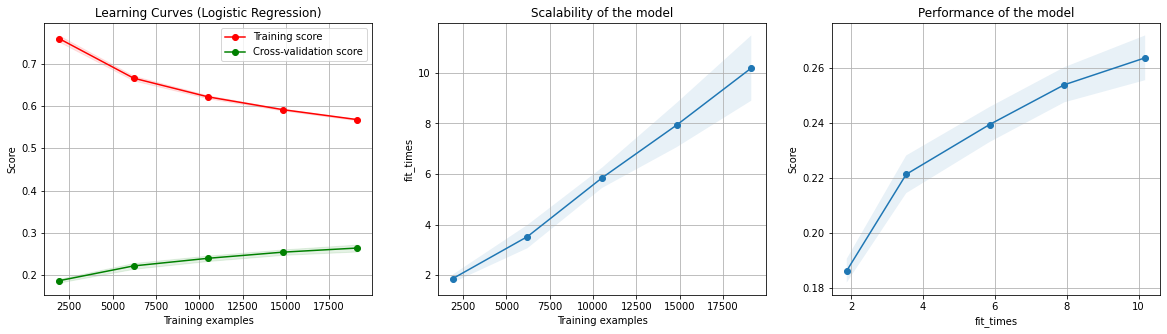

In [92]:
# Vectorize full dataset
X_vect = vectorizer.fit_transform(sentences)

# initialise cross-validation method
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

max_abs_scaler = MaxAbsScaler() #create scaling object
X_vect_scaled = max_abs_scaler.fit_transform(X_vect) #apply scaling
estimator = LogisticRegression(max_iter=10000, random_state=42) #perform logistic regression
crossval_plot = clf.plot_learning_curve(estimator, title, X_vect_scaled, labels, cv=cv, n_jobs=4) #plot results
crossval_plot